J =  [[134.21035714]]


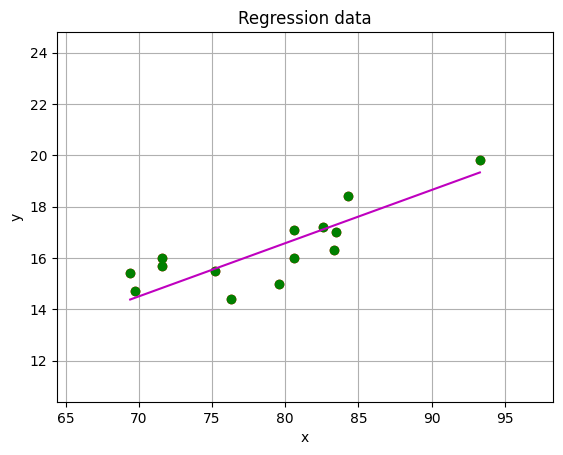

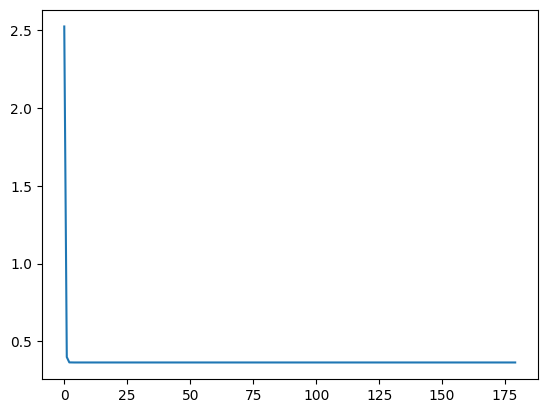

In [7]:
import numpy as np
import matplotlib.pyplot as plt




def computeCost(X, y, theta):
    m = y.size
    z = np.dot(X, theta) - y
    J = 1 / (2 * m) * np.dot(z.T, z)
    return J

def gradient_decend_batch(X, y, theta, alpha, iter_num):
    m = y.shape[0]
    n = theta.size
    J_iter = np.zeros((iter_num, 1))
    for iter in range(iter_num):
        z = np.dot(X, theta) - y
        theta = theta - alpha * np.dot(X.T, z)
        J = computeCost(X,y,theta)
        J_iter[iter] = J
    return theta, J_iter

def plot_reg_line(X, y, theta):
    """
    plot_reg_line plots the data points and regression line 
    for linear regrssion
    Input arguments: X - np array (m, n) - independent variable.
    y - np array (m,1) - target variable
    theta - parameters
    """
    if X.shape[1] == 2: 
        ind = 1
    else:
        ind = 0           
        
    x_min = X[:,ind].min()
    x_max = X[:,ind].max()
    ind_min = X[:,ind].argmin()
    ind_max = X[:,ind].argmax()
    y_min = y[ind_min]
    y_max = y[ind_max]
    Xlh = X[(ind_min, ind_max),:]
    yprd_lh = np.dot(Xlh, theta)
    plt.plot(X[:,ind], y, 'go', Xlh, yprd_lh, 'm-')
    plt.axis((x_min-5, x_max+5, min(y_min,y_max) - 5 , max(y_min,y_max)+5))
    plt.xlabel('x'), plt.ylabel('y'), 
    plt.title('Regression data')
    plt.grid()
    plt.show()


data = np.load("Materials for ex. 1 - Linear Regression and Gradient Descent-20230322/Cricket.npz")

yx = data["arr_0"]
x = yx[:, 1]
y = yx[:, 0]
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
plt.plot(x, y, "ro")


m = y.shape[0]
onesvec = np.ones((m, 1))
X = np.concatenate((onesvec, x), axis = 1)
n = X.shape[1]
#Xlh= X[(ind_xmin, ind_xmax), :]
alpha = 0.00001
theta = np.zeros((n, 1))
num_iter = 180
J = computeCost(X, y, theta)
print('J = ', J)
theta, J_iter = gradient_decend_batch(X, y, theta, alpha, num_iter)
plot_reg_line(X, y, theta)
plt.plot(J_iter)
plt.show()

